In [1]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from pathlib import Path 
cwd = Path.cwd()
data_f = cwd / 'Country-data.csv'

df = pd.read_csv(data_f).set_index("country")

In [3]:
df 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


The vectors w_m and  w_{n} are the row and column masses or the marginal probabilities for the rows and columns, respectively. Subtracting matrix 
outer (wm, wn) outer(w_{m},w_{n}) from matrix. P is the matrix algebra version of double centering the data. Multiplying this difference by the diagonal weighting matrices results in a matrix containing weighted deviations from the origin of a vector space. 

In [4]:
# goal do correspondence analysis
# preprocessing 
# m = rows, n = columns
m,n = df.shape
print(m,n)
C = df.values
# sum of all values
n_C = df.values.sum()

row_weights = [np.sum(df.values[i]) for i in range(m)]# row sums
col_weights = [np.sum(df.values[:,i]) for i in range(n)]# row sums

row_weights = np.array(row_weights)/n_C
col_weights = np.array(col_weights)/n_C

W_m = np.diag(np.power(row_weights, -1/2))
W_n = np.diag(np.power(col_weights, -1/2))

P =  C/ n_C 
# S = W_m (P- (w_m w_n)W_n  ))
S = np.dot(W_m, np.dot(P - np.outer(row_weights, col_weights), W_n))
print(S.shape)
#print(S)

167 9
(167, 9)


In [8]:
U, s, V = np.linalg.svd(S, full_matrices=False)
D = np.diag(s)
#np.dot(np.dot(U,D), V)
print(U.shape)
print(D.shape)
print(V.shape)

(167, 9)
(9, 9)
(9, 9)


In [29]:
# do SVD on S
print(S.shape)
U, s, V = np.linalg.svd(S, full_matrices=False)
V = V.T
print(s)
print(f"shapes: {U.shape}, {s.shape}, {V.shape}")
Sigma = np.diag(s)
print(np.diag(Sigma))
print(f" W_m U  sigma shapes: {W_m.shape}, {U.shape}, {Sigma.shape}")
print(f" W_n U  sigma shapes: {W_n.shape}, {V.shape}, {Sigma.shape}")
#F_m = np.matmul(W_m, U, Sigma)
if False:
    print(W_n.shape)
    print(W_m.shape)
    print(U.shape)
    print(V.shape)
    print(Sigma.shape)
    print("--")
    print(G_m.shape)
    print(G_n.shape)


(167, 9)
[2.31003178e-01 1.69857285e-01 5.30133713e-02 4.13643996e-02
 2.49587850e-02 2.04254224e-02 9.67356369e-03 6.76487167e-03
 4.91966915e-16]
shapes: (167, 9), (9,), (9, 9)
[2.31003178e-01 1.69857285e-01 5.30133713e-02 4.13643996e-02
 2.49587850e-02 2.04254224e-02 9.67356369e-03 6.76487167e-03
 4.91966915e-16]
 W_m U  sigma shapes: (167, 167), (167, 9), (9, 9)
 W_n U  sigma shapes: (9, 9), (9, 9), (9, 9)


[2.31003178e-01 1.69857285e-01 5.30133713e-02 4.13643996e-02
 2.49587850e-02 2.04254224e-02 9.67356369e-03 6.76487167e-03
 4.91966915e-16]
[2.31003178e-01 1.69857285e-01 5.30133713e-02 4.13643996e-02
 2.49587850e-02 2.04254224e-02 9.67356369e-03 6.76487167e-03
 4.91966915e-16]


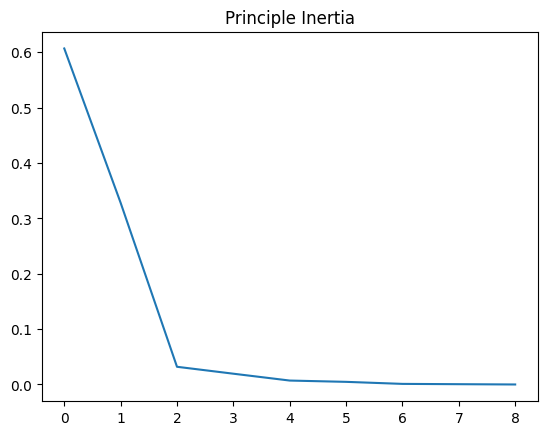

In [30]:
# diagonal entries of Sigma
print(np.diag(Sigma))
print(s)
total_interia = np.sum(np.power(s,2))
principal_interia = [np.diag(Sigma)[i] ** 2/total_interia for i in range(len(np.diag(Sigma)))]
principal_interia
plt.plot(principal_interia, label = "principal interia")
plt.title("Principle Inertia")
plt.show()

In [31]:
# total inertia
I = np.sum(np.power(S,2))


In [32]:
#F_m = np.matmul(W_m, U, Sigma)
F_m = W_m @ U @ Sigma
F_n = W_n @ V @ Sigma

G_m = W_m @ U # Standardized row coordinates
G_n = W_n @ V

# standardize F_M and F_n, so they have mean 0 and variance 1
np.mean(F_m)
# Possible need to rescale
F_m_standardize = (F_m - np.mean(F_m))/np.std(F_m)
F_n_standardize = (F_n - np.mean(F_n))/np.std(F_n)
#F_m = F_m / np.sqrt(I)
#F_n = F_n / np.sqrt(I)
#np.mean(G_m, axis = 1)


In [33]:
print(m) # rows 
print(n) # cols
print(df.shape)

167
9
(167, 9)


Usually the first two dimensions of the CA solution are plotted because they encompass the maximum of information about the data table that can be displayed in 2D although other combinations of dimensions may be investigated by a biplot. A biplot is in fact a low dimensional mapping of a part of the information contained in the original table.

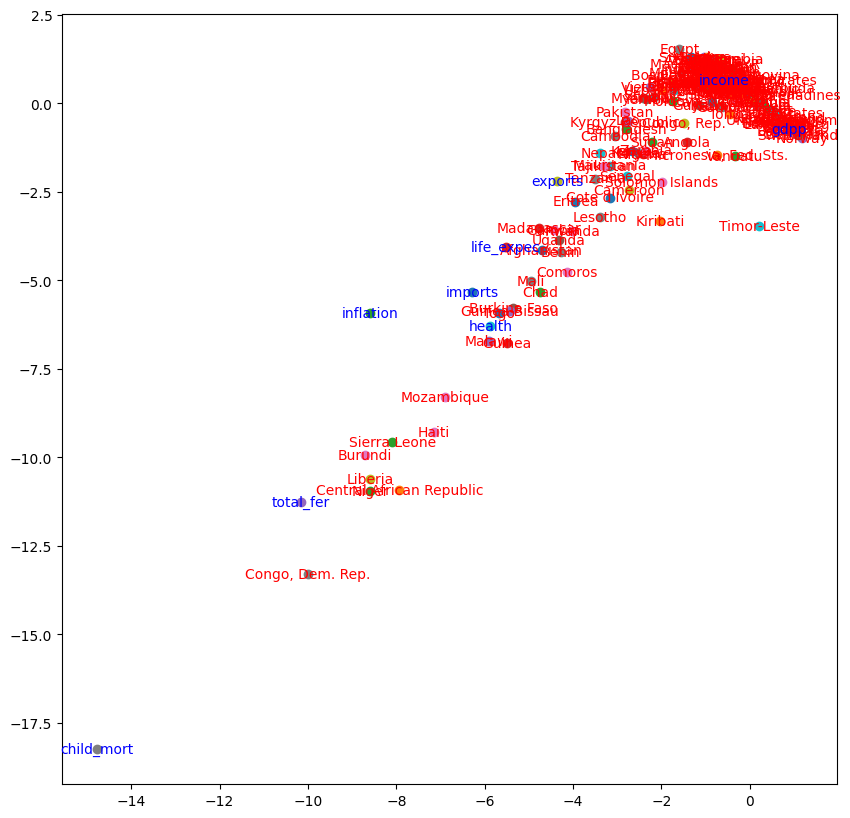

In [35]:
# plt the first two columns of G_m
plt.figure(figsize=(10,10))
for i in range(m): # Rows
    plt.scatter(G_m[i,0], G_m[i,1])
    plt.text(G_m[i,0], G_m[i,1], df.index[i], va='center', ha='center', c = 'r')
for i in range(n): # cols
    plt.scatter(G_n[i,0], G_n[i,1])
    plt.text(G_n[i,0], G_n[i,1], df.columns[i], va='center', ha='center', c = 'b')
#plt.scatter(G_m[:,0], G_m[:,1])
#plt.text(G_m[:0], G_m[:1], df.columns, va='center', ha='center', color='r')
plt.show()


In [36]:
# reference plot constructed from https://okomestudio.net/biboroku/2014/05/brand-positioning-by-correspondence-analysis/

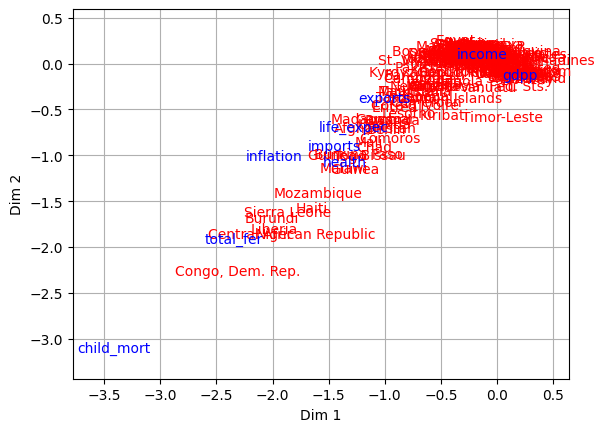

In [23]:
ct = df.values
rows = df.index.values
cols = df.columns.values
#rows = ct.index.values 
#cols = ct.columns.values 
    
N = np.matrix(ct, dtype=float)

# correspondence matrix from contingency table
P = N / N.sum()

# row and column marginal totals of P as vectors
r = P.sum(axis=1)
c = P.sum(axis=0).T

# diagonal matrices of row/column sums
D_r_rsq = np.diag(1. / np.sqrt(r.A1))
D_c_rsq = np.diag(1. / np.sqrt(c.A1))

# the matrix of standarized residuals
S = D_r_rsq * (P - r * c.T) * D_c_rsq

# compute the SVD
U, D_a, V = np.linalg.svd(S, full_matrices=False)
D_a = np.asmatrix(np.diag(D_a))
V = V.T

###
# principal coordinates of rows
F = D_r_rsq * U * D_a

# principal coordinates of columns
G = D_c_rsq * V * D_a

# standard coordinates of rows
X = D_r_rsq * U

# standard coordinates of columns
Y = D_c_rsq * V

# the total variance of the data matrix
inertia = sum([(P[i,j] - r[i,0] * c[j,0])**2 / (r[i,0] * c[j,0])
                for i in range(N.shape[0])
                for j in range(N.shape[1])])


def plot():
    """Plot the first and second dimensions."""
    xmin, xmax = None, None
    ymin, ymax = None, None
    if rows is not None:
        for i, t in enumerate(rows):
            x, y = F[i,0], F[i,1]
            plt.text(x, y, t, va='center', ha='center', color='r')
            xmin = min(x, xmin if xmin else x)
            xmax = max(x, xmax if xmax else x)
            ymin = min(y, ymin if ymin else y)
            ymax = max(y, ymax if ymax else y)
    else:
        plt.plot(F[:, 0], F[:, 1], 'ro')

    if cols is not None:
        for i, t in enumerate(cols):
            x, y = G[i,0], G[i,1]
            plt.text(x, y, t, va='center', ha='center', color='b')
            xmin = min(x, xmin if xmin else x)
            xmax = max(x, xmax if xmax else x)
            ymin = min(y, ymin if ymin else y)
            ymax = max(y, ymax if ymax else y)
    else:
        plt.plot(G[:, 0], G[:, 1], 'bs')

    if xmin and xmax:
        pad = (xmax - xmin) * 0.1
        plt.xlim(xmin - pad, xmax + pad)
    if ymin and ymax:
        pad = (ymax - ymin) * 0.1
        plt.ylim(ymin - pad, ymax + pad)

    plt.grid()
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')

def scree_diagram(self, perc=True, *args, **kwargs):
    """Plot the scree diagram."""
    eigenvals = eigenvals
    xs = np.arange(1, eigenvals.size + 1, 1)
    ys = 100. * eigenvals / eigenvals.sum() if perc else eigenvals
    plt.plot(xs, ys, *args, **kwargs)
    plt.xlabel('Dimension')
    plt.ylabel('Eigenvalue' + (' [%]' if perc else ''))

plot()